# basic plotting with Pandas

# histograms

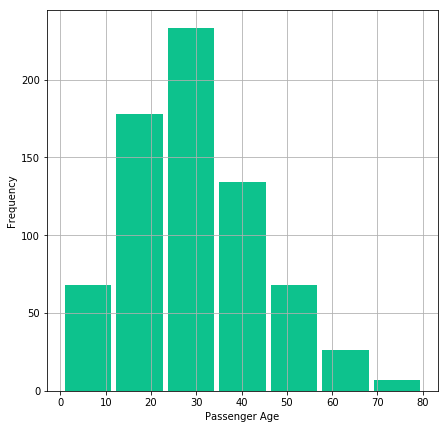

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd

# load the contents of a file into a pandas Dataframe
input_file = './datasets/titanic_dataset/original/train.csv'
df_titanic = pd.read_csv(input_file)

# set the index
df_titanic.set_index("PassengerId", inplace=True)

fig = plt.figure(figsize=(7,7))
plt.xlabel('Passenger Age')
plt.ylabel('Count')

df_titanic['Age'].plot.hist(color='#0dc28d', align='mid', 
                            rwidth=0.90, bins=7, grid=True)

# bar charts

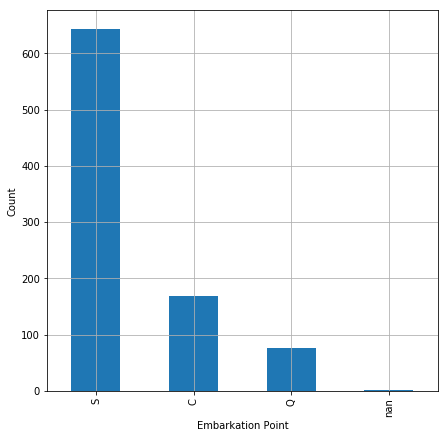

In [2]:
# use Pandas dataframe functions to plot a bar chart of the 'Embarked' attribute
fig = plt.figure(figsize=(7,7))
plt.xlabel('Embarkation Point')
plt.ylabel('Count')

df_titanic['Embarked'].value_counts(dropna=False).plot.bar(grid=True)

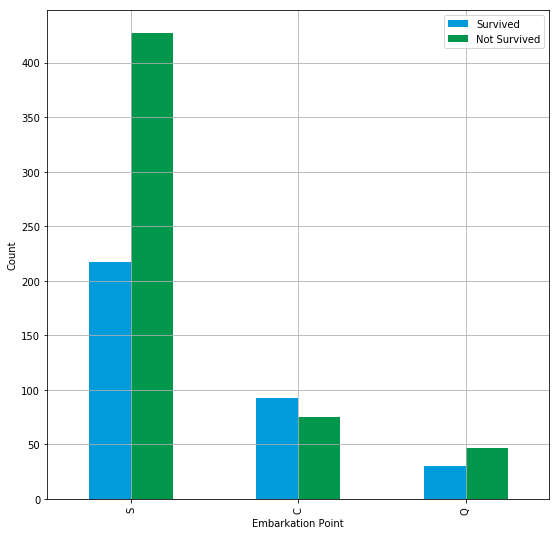

In [3]:
# a grouped bar chart for the Embarked attribute with
# two bars per group.
survived_df = df_titanic[df_titanic['Survived']==1]
not_survived_df = df_titanic[df_titanic['Survived']==0]

values = df_titanic['Embarked'].dropna().unique()
embarked_counts_survived = survived_df['Embarked'].value_counts(dropna=True)
embarked_counts_not_survived = not_survived_df['Embarked'].value_counts(dropna=True)

embarked_counts_survived.name = 'Survived'
embarked_counts_not_survived.name = 'Not Survived'
df = pd.concat([embarked_counts_survived, embarked_counts_not_survived], axis=1)

fig, axes = plt.subplots(figsize=(9,9))
plt.xlabel('Embarkation Point')
plt.ylabel('Count')

df.plot.bar(grid=True, ax=axes, color=['#009bdb', '#00974d'])


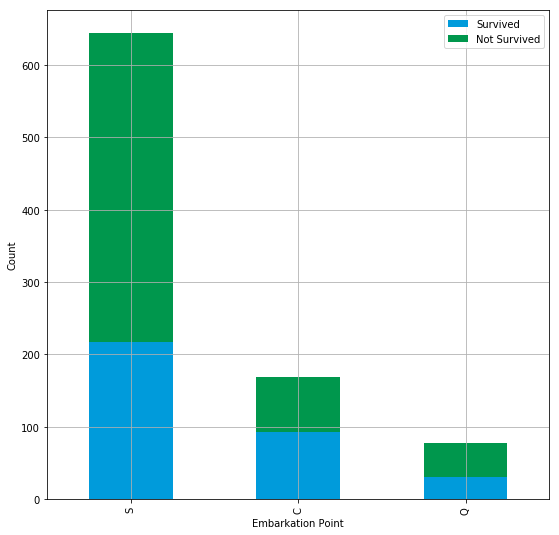

In [4]:
# a stacked bar chart for the Embarked attribute with
# showing the number of survivors in each category
survived_df = df_titanic[df_titanic['Survived']==1]
not_survived_df = df_titanic[df_titanic['Survived']==0]

values = df_titanic['Embarked'].dropna().unique()
embarked_counts_survived = survived_df['Embarked'].value_counts(dropna=True)
embarked_counts_not_survived = not_survived_df['Embarked'].value_counts(dropna=True)

embarked_counts_survived.name = 'Survived'
embarked_counts_not_survived.name = 'Not Survived'
df = pd.concat([embarked_counts_survived, embarked_counts_not_survived], axis=1)

fig, axes = plt.subplots(figsize=(9,9))
plt.xlabel('Embarkation Point')
plt.ylabel('Count')

df.plot.bar(stacked=True, grid=True, ax=axes, color=['#009bdb', '#00974d'])

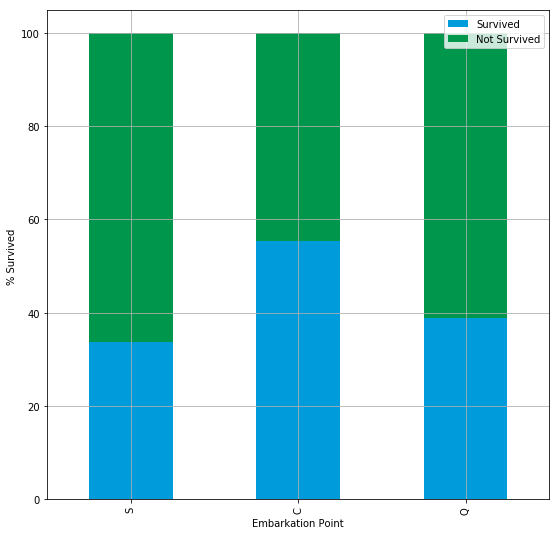

In [5]:
# a stacked percentage bar chart for the Embarked attribute with
# showing the number of survivors in each category
survived_df = df_titanic[df_titanic['Survived']==1]
not_survived_df = df_titanic[df_titanic['Survived']==0]

values = df_titanic['Embarked'].dropna().unique()
counts = df_titanic['Embarked'].value_counts(dropna=True)

embarked_counts_survived = survived_df['Embarked'].value_counts(dropna=True)
embarked_counts_not_survived = not_survived_df['Embarked'].value_counts(dropna=True)

embarked_counts_survived_percent = embarked_counts_survived / counts * 100
embarked_counts_not_survived_percent = embarked_counts_not_survived / counts * 100

embarked_counts_survived_percent.name = 'Survived'
embarked_counts_not_survived_percent.name = 'Not Survived'
df = pd.concat([embarked_counts_survived_percent, embarked_counts_not_survived_percent], axis=1)

fig, axes = plt.subplots(figsize=(9,9))
plt.xlabel('Embarkation Point')
plt.ylabel('% Survived ')

df.plot.bar(stacked=True, grid=True, ax=axes, color=['#009bdb', '#00974d'])


# pie chart

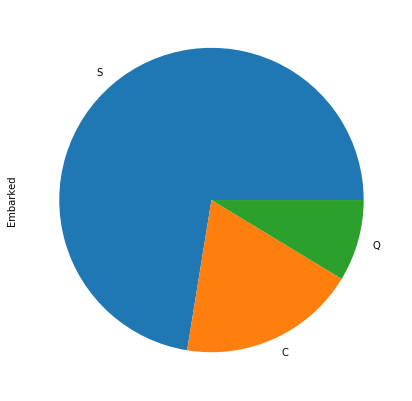

In [6]:
# use Pandas functions to plot a pie chart of the 'Embarked' attribute
fig = plt.figure(figsize=(7,7))

df_titanic['Embarked'].value_counts(dropna=True).plot.pie()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1177d6b70>,
      dtype=object)

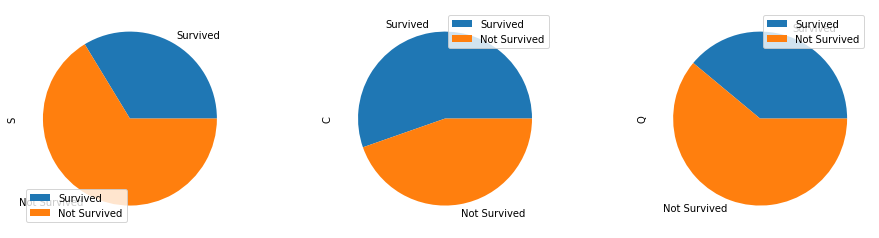

In [7]:
# three pie charts, showiing the proportion
# of survivors for each embarkation point
# S = Southampton
# C = Cherbourg
# Q = Queenstown

survived_df = df_titanic[df_titanic['Survived']==1]
not_survived_df = df_titanic[df_titanic['Survived']==0]

values = df_titanic['Embarked'].dropna().unique()
counts = df_titanic['Embarked'].value_counts(dropna=True)

embarked_counts_survived = survived_df['Embarked'].value_counts(dropna=True)
embarked_counts_not_survived = not_survived_df['Embarked'].value_counts(dropna=True)

embarked_counts_survived_percent = embarked_counts_survived / counts * 100
embarked_counts_not_survived_percent = embarked_counts_not_survived / counts * 100

embarked_counts_survived_percent.name = 'Survived'
embarked_counts_not_survived_percent.name = 'Not Survived'
df = pd.concat([embarked_counts_survived_percent, embarked_counts_not_survived_percent], axis=1)

df.T.plot.pie(sharex=True, subplots=True, figsize=(16, 4))

# box plots

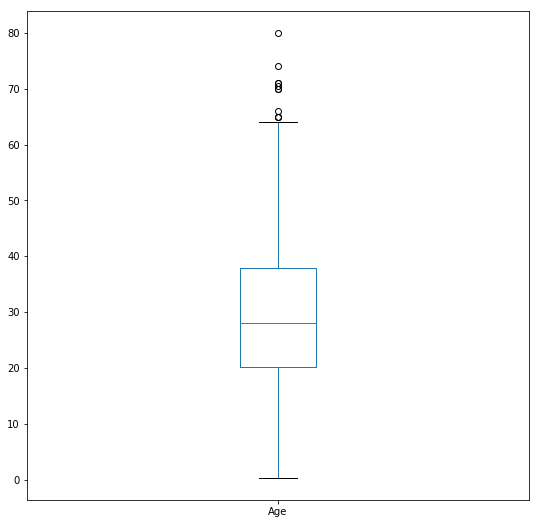

In [8]:
# create a box plot of the Age attribute
df_titanic.boxplot(column = 'Age', figsize=(9,9), grid=False);

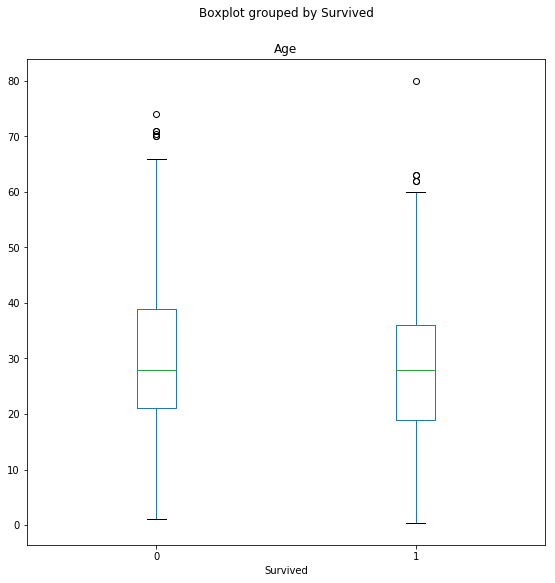

In [9]:
# compare box plots of the Age attribute for those who survived
# against those that did not.
df_titanic.boxplot(column = 'Age', by = 'Survived', figsize=(9,9), grid=False);

# scatter plots

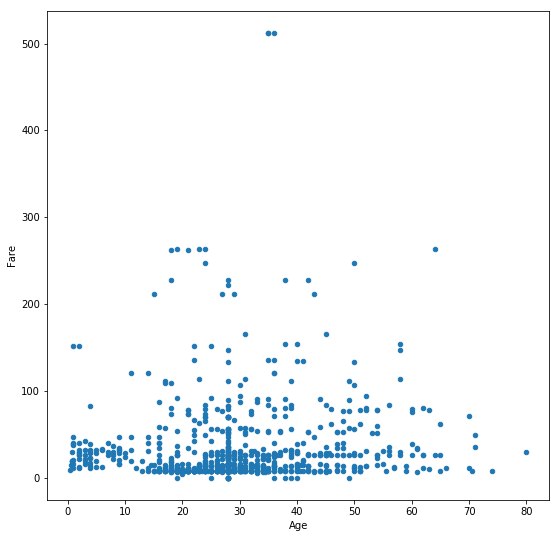

In [12]:
# use pandas functions to create a scatter plot of the 'Age' and 'Fare' attribute

# impute missing values:
# Age with the median age
# Fare with the mean fare
median_age = df_titanic['Age'].median()
df_titanic["Age"].fillna(median_age, inplace=True)

mean_fare = df_titanic['Fare'].mean()
df_titanic["Fare"].fillna(mean_fare, inplace=True)

df_titanic.plot.scatter(x='Age', y='Fare', figsize=(9,9))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a19e05198>,
      dtype=object)

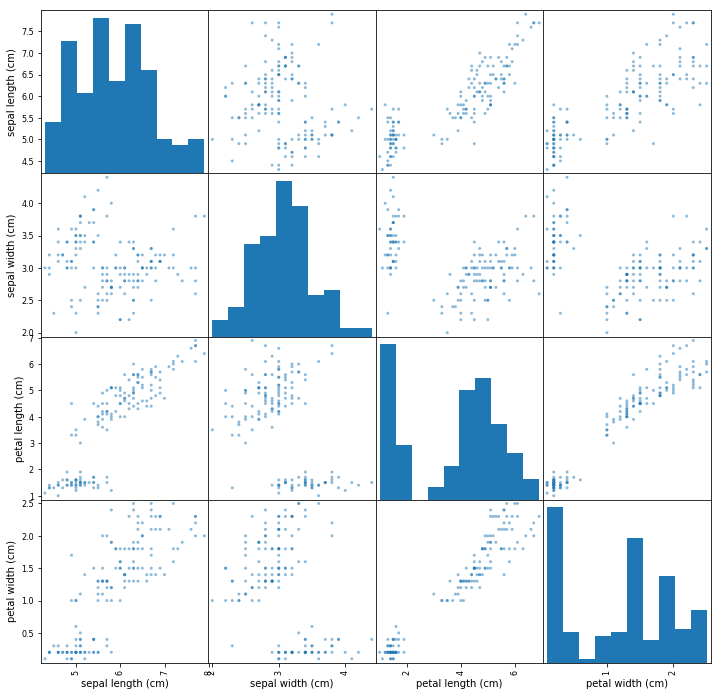

In [16]:
import sklearn.datasets
import pandas.plotting

iris = sklearn.datasets.load_iris()
df_iris = pd.DataFrame(iris.data, columns = iris.feature_names)

pandas.plotting.scatter_matrix(df_iris, figsize=(12, 12))